In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.linear_model import  ElasticNet
from sklearn.feature_selection import SelectFromModel

Loading data
======

In [26]:

file2015 = '2015 FE Guide-for DOE-Mobility Ventures only-OK to release-no-sales-4-27-2017Mercedesforpublic.xlsx'
file2016 = '2016 FE Guide for DOE-OK to release-no-sales-4-27-2017Mercedesforpublic.xlsx'
file2017 = '2017 FE Guide for DOE-release dates before 9-20-2017-no sales-9-19-2017MercedesCadillacforpublic.xlsx'
file2018 = '2018 FE Guide for DOE-release dates before 2-17-2018-no-sales-2-15-2018public.xlsx'

data2015 = pd.ExcelFile(file2015)
data2016 = pd.ExcelFile(file2016)
data2017 = pd.ExcelFile(file2017)
data2018 = pd.ExcelFile(file2018)


In [27]:
df2015 = data2015.parse('FEguide')
df2016 = data2016.parse('FEguide')
df2017 = data2017.parse('FEguide')
df2018 = data2018.parse('FEguide')

In [28]:
list(df2015)
print(len(list(df2015)))
print(len(list(df2016)))
print(len(list(df2017)))
print(len(list(df2018)))


162
162
162
162


Selecting columns with more than 75% of observations
=====

In [29]:
frac = (df2015.apply(lambda x: x.count(), axis=0)/1249*100).values
zipped = zip(df2015.columns, frac)
df2015 = df2015[[x[0] for x in list(filter(lambda x: x[1] > 75, zipped))]]

frac = (df2016.apply(lambda x: x.count(), axis=0)/1249*100).values
zipped = zip(df2016.columns, frac)
df2016 = df2016[[x[0] for x in list(filter(lambda x: x[1] > 75, zipped))]]

frac = (df2017.apply(lambda x: x.count(), axis=0)/1249*100).values
zipped = zip(df2017.columns, frac)
df2017 = df2017[[x[0] for x in list(filter(lambda x: x[1] > 75, zipped))]]


frac = (df2018.apply(lambda x: x.count(), axis=0)/1249*100).values
zipped = zip(df2018.columns, frac)
df2018 = df2018[[x[0] for x in list(filter(lambda x: x[1] > 75, zipped))]]



In [30]:
print(len(df2015.apply(lambda x: x.count(), axis=0)/1249*100))
print(len(df2016.apply(lambda x: x.count(), axis=0)/1249*100))
print(len(df2017.apply(lambda x: x.count(), axis=0)/1249*100))
print(len(df2018.apply(lambda x: x.count(), axis=0)/1249*100))

63
63
64
65


In [31]:
train = pd.concat([df2015, df2016, df2017], ignore_index= True)

for i in train:
        for k in train[i]:
            if k == 'Mod':
                train[i] = train[i].replace('Mod', 0)

for n in df2018:
        for m in df2018[n]:
            if m == 'Mod':
                df2018[n] = df2018[n].replace('Mod', 0)


Variables that will be included in the data set 

In [32]:
numerical = ['Model Year', 
             'Eng Displ', 
             '# Cyl', 
             'Intake Valves Per Cyl',
             '# Gears',
             'Annual Fuel1 Cost - Conventional Fuel',
             'Exhaust Valves Per Cyl',
             '$ You Spend over 5 years (increased amount spent in fuel costs over 5 years - on label) ',
             'Max Ethanol % - Gasoline',
             'Release Date', 'Comb Unrd Adj FE - Conventional Fuel']

categorical = ['Mfr Name', 
               'Division', 
               'Carline', 
               'Carline Class',
               'Verify Mfr Cd',
               'Index (Model Type Index)', 
               'Transmission',
               'Trans',
               'Drive Sys', 
               'Fuel Usage  - Conventional Fuel',
               'Fuel Unit - Conventional Fuel',
               'Fuel Metering Sys Cd',
               'Oil Viscosity']

boolean = ['Lockup Torque Converter',
           'Trans Creeper Gear', 
           'Cyl Deact?', 
           'Var Valve Timing?', 
           'Var Valve Lift?', 
           'Camless Valvetrain (Y or N)', 
           'Stop/Start System (Engine Management System) Code',
           'Suppressed?', 
           'Police/Emerg?',
           'Label Recalc?',
           'Unique Label?']

predict = ["Comb Unrd Adj FE - Conventional Fuel"]

data = numerical + categorical + boolean

train = train[data]

Selecting same features for train and test sets

In [33]:
feature = []
for i in train:
    feature.append(i)
    
df_test = df2018[feature]


Imputer and Scaler for train data 
=====

In [34]:

#converting date to integer format
train['Release Date'] = train['Release Date'].astype(np.int64)
train.dtypes

# train_cat = train.select_dtypes(include=['object'])
# train_num = train.select_dtypes(include=['int64','float64'])
# train_num
#train = pd.get_dummies(train)
train_num = train[numerical]


imp = Imputer(missing_values = 'NaN', strategy = 'mean').fit(train_num)
train_imp = imp.transform(train_num)
train_imp1 = pd.DataFrame(train_imp, columns = train_num.columns)

scaler = StandardScaler()
scaler.fit(train_imp1)
train_imp_scaled = scaler.transform(train_imp1)
train_imp_scaled1 = pd.DataFrame(train_imp_scaled, columns = train_imp1.columns)



In [35]:

feature_s = categorical + boolean
train_full = pd.concat([train_imp_scaled1, train[feature_s]], axis = 1)
train_d = pd.get_dummies(train_full, columns = feature_s)


Imputer and Scaler for test data
=====

In [36]:
df_test_num = df_test[numerical]

df_test_num['Release Date'] = df_test_num['Release Date'].astype(np.int64)


imp1 = Imputer(missing_values = 'NaN', strategy = 'mean').fit(df_test_num)
test_imp = imp1.transform(df_test_num)
test_imp1 = pd.DataFrame(test_imp, columns = df_test_num.columns)


test_imp_scaled = scaler.transform(test_imp1)
test_imp_scaled1 = pd.DataFrame(test_imp_scaled, columns = test_imp1.columns)


df_test_cat = df_test[categorical + boolean] 

test_full = pd.concat([test_imp_scaled1, df_test[feature_s]],axis=1)

test_d = pd.get_dummies(test_full, columns = categorical + boolean)


/Users/elizabetdoliar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Split into test and train
=====

In [37]:

y_train = train_d['Comb Unrd Adj FE - Conventional Fuel']
X_train = train_d.drop('Comb Unrd Adj FE - Conventional Fuel', axis=1)

y_test1 = test_d['Comb Unrd Adj FE - Conventional Fuel']
X_test1 = test_d.drop('Comb Unrd Adj FE - Conventional Fuel', axis=1)


Ridge regression
=====

In [ ]:

param_grid = {'alpha': np.logspace(-3, 3, 13)}
grid_ridge = GridSearchCV(Ridge(), param_grid, cv=5)
grid_ridge.fit(X_train, y_train)
print(grid_ridge.best_params_)
print(grid_ridge.best_score_)
ridge = grid_ridge.best_estimator_

sorted(grid_ridge.cv_results_.keys())

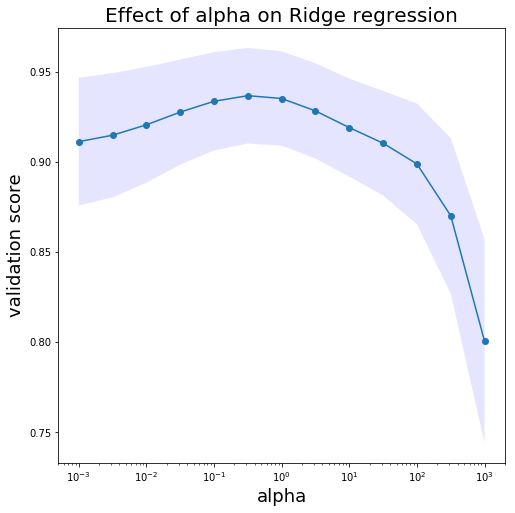

In [17]:
plt.figure(figsize=(8,8))
plt.xscale('log')
plt.title('Effect of alpha on Ridge regression', fontsize=20)
plt.xlabel('alpha', fontsize=18)
plt.ylabel('validation score', fontsize=18)
plt.plot(param_grid['alpha'], grid_ridge.cv_results_['mean_test_score'], marker='o')
plt.fill_between(param_grid['alpha'], grid_ridge.cv_results_['mean_test_score'] 
                 + grid_ridge.cv_results_['std_test_score'], 
                 grid_ridge.cv_results_['mean_test_score'] - 
                 grid_ridge.cv_results_['std_test_score'], 
                 facecolor='blue', 
                 alpha=0.1)
plt.show()

In [62]:
print(y_test.shape)
print(X_test.shape)
ridge.score(X_test, y_test)

(1220,)
(1220, 1531)


0.9886057726020322

Lasso
=====

In [18]:
%%time
param_grid = {'alpha': np.logspace(-4, 0, 13)}
grid_lasso = GridSearchCV(Lasso(normalize=True), param_grid, cv=5)
grid_lasso.fit(X_train, y_train)
print(grid_lasso.best_score_)
print(grid_lasso.best_params_)
lasso = grid_lasso.best_estimator_

0.92851052459
{'alpha': 0.0001}
CPU times: user 13.5 s, sys: 1.92 s, total: 15.5 s
Wall time: 15.4 s


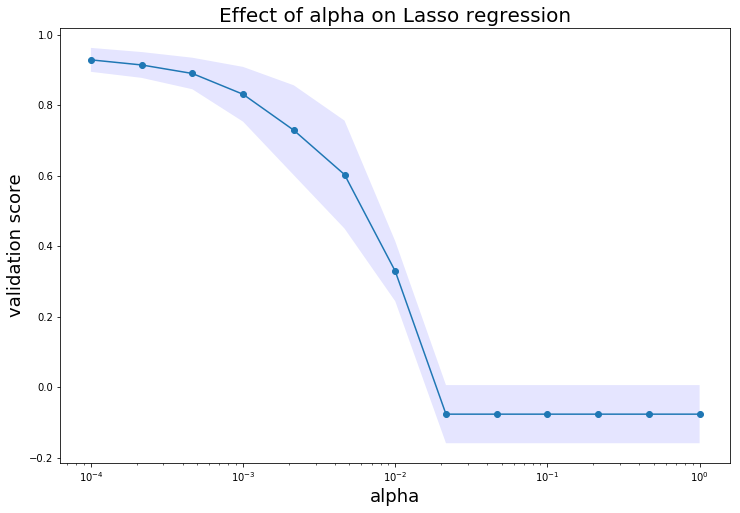

In [65]:
plt.figure(figsize=(12,8))
plt.xscale('log')
plt.title('Effect of alpha on Lasso regression', fontsize=20)
plt.xlabel('alpha', fontsize=18)
plt.ylabel('validation score', fontsize=18)
plt.plot(param_grid['alpha'], grid_lasso.cv_results_['mean_test_score'], marker='o')
plt.fill_between(param_grid['alpha'], grid_lasso.cv_results_['mean_test_score']
                 + grid_lasso.cv_results_['std_test_score'], 
                 grid_lasso.cv_results_['mean_test_score']
                 - grid_lasso.cv_results_['std_test_score'], 
                 facecolor='blue', 
                 alpha=0.1)
plt.show()

In [ ]:
print('R2 score :', lasso.score(X_test1, y_test1))

ElasticNet
======

In [68]:
from sklearn.linear_model import  ElasticNet
param_grid = {'alpha': np.logspace(-2, 3, 13)}
grid_elastic_net = GridSearchCV(ElasticNet(), param_grid, cv=10)
grid_elastic_net.fit(X_train, y_train)
print(grid_elastic_net.best_params_)
print(grid_elastic_net.best_score_)
elastic_net = grid_elastic_net.best_estimator_
print(elastic_net)

{'alpha': 0.01}
0.872886136203
ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


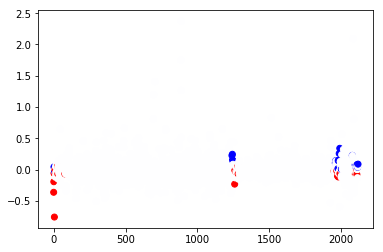

array([ -3.94979878e-01,  -8.96879028e-02,   1.47351605e-02, ...,
        -0.00000000e+00,  -0.00000000e+00,   3.03549338e-04])

In [112]:
plt.scatter(range(X_train.shape[1]), ridge.coef_,
            c=np.sign(elastic_net.coef_), cmap="bwr_r")
plt.show()

elastic_net.coef_

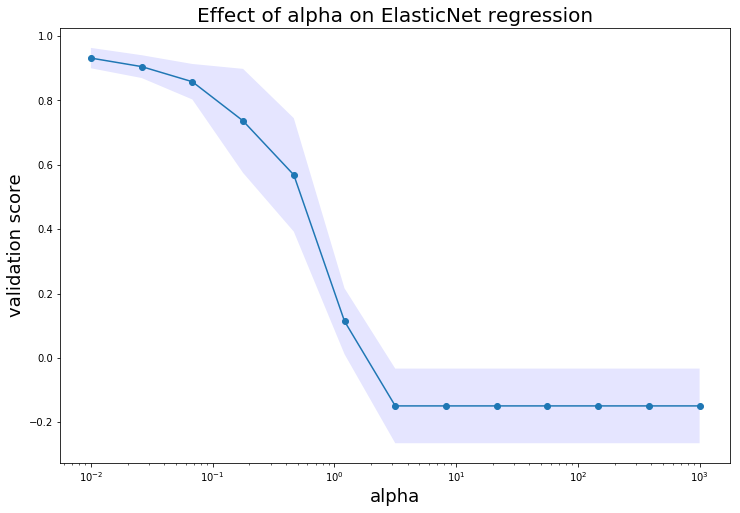

In [67]:
plt.figure(figsize=(12,8))
plt.xscale('log')
plt.title('Effect of alpha on ElasticNet regression', fontsize=20)
plt.xlabel('alpha', fontsize=18)
plt.ylabel('validation score', fontsize=18)
plt.plot(param_grid['alpha'], grid_elastic_net.cv_results_['mean_test_score'], 
         marker='o')
plt.fill_between(param_grid['alpha'], grid_elastic_net.cv_results_['mean_test_score']
                 + grid_elastic_net.cv_results_['std_test_score'], 
                 grid_elastic_net.cv_results_['mean_test_score']
                 - grid_elastic_net.cv_results_['std_test_score'],
                 facecolor='blue', 
                 alpha=0.1)
plt.show()

In [ ]:
print('R2 score :', elastic_net.score(X_test, y_test))

Feature Selection 
========

In [ ]:
polyn = PolynomialFeatures()
X_train_poly = polyn.fit_transform(X_train_sparse)

param_grid = {'alpha': np.logspace(-3, -1, 9)}
grid_ridge1 = GridSearchCV(Ridge(), param_grid, cv=10)
grid_ridge1.fit(X_train_poly, y_train)
print(grid_ridge1.best_params_)
print(grid_ridge1.best_score_)
ridge_poly = grid_ridge1.best_estimator_

In [ ]:
plt.figure(figsize=(18,7))
plt.title('Ridge coefficents', fontsize=15)
plt.xlabel('coefficient nymber', fontsize=15)
plt.ylabel('value', fontsize=15)
plt.scatter(range(np.shape(X_train)[1]), ridge_poly.coef_, c=np.sign(lasso_poly.coef_), cmap="bwr_r")
plt.show()